# **NUTRITIONAL ANALYSIS (2019-202)**

## Importing Libraries and Data

In [3]:
!pip install -r requirements.txt

In [4]:
#Importing
%pip install python-gnupg
%pip install eep153_tools
%matplotlib inline
import pandas as pd
import numpy as np
import eep153_tools
import cfe
from cfe import Regression
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
%run Acquiring_Dataframes.py

## Nutritional Adequacy of Diet: Determining Which Nutrients Are Lacking

In [6]:
#Get saved result for Uganda 2019-20
ugd8_result = cfe.read_pickle('RGSN Files/Uganda19-20.rgsn')
#Define predicted expenditures
xhat = ugd8_result.predicted_expenditures()
#Prices dataframe from kg -> 100g
ugd8_p_100g = ugd8_p / 10
#Quantities in kg: expenditures divided by prices/kg
qhat = (xhat.unstack('j')/ugd8_p_100g.reset_index(drop=True, level="u").transpose()).dropna(how='all')
#Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

In [7]:
#Columns of qhat to match fct
use = ugd_fct.index.intersection(qhat.columns)

nutrients = qhat[use]@ugd_fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household

n
Energy          1.750944e+06
Protein         3.471171e+04
Fiber           2.564168e+04
Folate          3.855728e+05
Calcium         2.337886e+05
Carbohydrate    2.356572e+05
Iron            8.923130e+03
Niacin          9.588084e+03
Riboflavin      7.723041e+02
Thiamin         1.135016e+03
Vitamin A       2.410065e+05
Vitamin B-12    7.454389e+02
Vitamin B-6     1.905101e+03
Vitamin C       1.116559e+05
Zinc            5.192237e+03
Magnesium       2.778679e+03
Phosphorus      3.824033e+04
Potassium       2.645579e+04
Vitamin E       7.741536e+02
Vitamin K       1.225170e+04
dtype: float64

In [8]:
#Obtain recommended daily intake
ugd8_z = ugd8_z[ugd_rdi.columns.tolist()]
hh_rdi = ugd8_z@ugd_rdi.T
#Make this a recommended WEEKLY intake
hh_rwi = hh_rdi*7
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)
nutrient_ratio = nutrients[use_nutrients].div(hh_rwi[use_nutrients])
nutrient_ratio = nutrient_ratio[nutrient_ratio.count(axis=1) > 0]  # keep only rows with at least one nutrient
#Display
nutrient_ratio

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
i,t,m,,,,,,,,,,,,,,,,,,,,
0007d1f1449242feb5a25429644fb991,2019-20,Northern,27.847189,22.887895,31.499596,32.745336,6.664670,56.847321,23.408695,20.922886,22.905681,34.478987,12.738802,11.381447,50.813561,62.971886,17.895622,0.221150,1.064593,0.150914,1.698742,4.698559
0010cbae3cea4ec9831f6cd92b02dc16,2019-20,Northern,28.882034,23.442826,31.053905,34.994207,6.813040,51.345479,26.496667,20.147163,23.789475,33.432190,12.517908,13.412739,43.877708,61.014861,17.641219,0.218202,0.982662,0.145954,1.975494,5.480619
00246782f8654441a9df0f6ec0b6fc9f,2019-20,Northern,13.217862,11.076483,13.239194,16.677896,3.054717,21.668472,11.111589,9.106251,10.292159,15.848800,5.786320,4.963494,22.555759,29.976949,8.436753,0.179674,0.896060,0.091162,1.054489,2.508203
005fbc5779014a0290b088071bde9f72,2019-20,Central,87.947011,71.032835,83.988514,81.831416,16.181832,145.964025,52.159481,65.981636,73.029748,93.757493,28.989192,37.726829,129.718294,115.509344,53.175975,0.797933,3.090329,0.602095,5.004729,15.558540
009c1baa0edb44f8af47773ce0b7caaa,2019-20,Western,41.533148,50.771804,50.606607,69.977268,7.680050,65.457068,42.496258,35.329723,38.666627,58.010517,13.248653,18.250299,84.806748,102.320098,29.873771,0.426309,1.167227,0.199795,2.594262,6.967369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff77648719664071a4e363956db92c08,2019-20,Eastern,57.488072,48.691384,51.939810,55.654698,9.829731,92.074871,33.374135,41.029084,44.375068,65.286076,23.723255,19.575400,101.546676,124.093239,34.114894,0.584920,2.082803,0.358900,3.920753,11.130271
ff8b330984bc466aaf2366c3eea3d8cc,2019-20,Northern,17.478875,17.963943,21.687143,27.930388,4.661575,32.562846,17.652934,13.999873,15.290195,26.093903,11.587477,5.336194,38.131118,49.138561,12.790902,0.187950,0.844500,0.098044,1.014807,2.149720
ffb33b3ededa4019a02be24224ab0440,2019-20,Western,23.333082,22.104162,28.133294,28.869039,5.405957,49.254331,21.484733,19.985214,19.570034,30.143734,6.620253,9.193502,45.100457,41.786320,16.710170,0.132866,0.691892,0.100236,0.968446,2.389481


In [9]:
##Save df - uncomment to save
#nutrient_ratio.to_csv('Nutrient Data/19-20 Nutrient Data.csv')

In [10]:
#2019-20 Data
#Prices
ugd4_p0 = pd.read_csv('Data Files/Uganda - Food Prices (2005-06).csv')
ugd4_p0 = ugd4_p0[ugd4_p0["u"] == "Kg"]
ugd4_p = pd.pivot_table(ugd4_p0, values="price", index=["j","u"], columns=["t","m"] , aggfunc="median")
#Food Expenditures
ugd4_x0 = pd.read_csv('Data Files/Uganda - Food Expenditures (2005-06).csv')
ugd4_x0['i'] = ugd4_x0['i'].astype(str)
ugd4_x = pd.pivot_table(ugd4_x0, values="Expenditure", index=["i","t","m"], columns="j" , aggfunc="median")
#Consumption
ugd4_x_long = ugd4_x.stack().reset_index(name="Expenditure")
ugd4_p_long = ugd4_p0
ugd4_c = ugd4_x_long.merge(ugd4_p_long, on=["j", "t", "m"], how="left")
ugd4_c["Consumption"] = ugd4_c["Expenditure"] / ugd4_c["price"]
ugd4_c = ugd4_c.pivot_table(values="Consumption", index=["i","t","m","u"], columns="j", aggfunc="sum")
#HH Characteristics
ugd_z0 = pd.read_csv('Data Files/Uganda - Household Characteristics.csv')
ugd4_z = ugd_z0[ugd_z0['t'] == '2005-06']
ugd4_z = ugd4_z.set_index(['i','t','m'])
ugd4_z.columns.name = 'k'
ugd4_z.fillna(0, inplace=True)

#Prices
ugd8_p0 = pd.read_csv('Data Files/Uganda - Food Prices (2019-20).csv')
ugd8_p0 = ugd8_p0[ugd8_p0["u"] == "Kg"]
ugd8_p = pd.pivot_table(ugd8_p0, values="price", index=["j","u"], columns=["t","m"] , aggfunc="median")
#Food Expenditures
ugd8_x0 = pd.read_csv('Data Files/Uganda - Food Expenditures (2019-20).csv')
ugd8_x0['i'] = ugd8_x0['i'].astype(str)
ugd8_x = pd.pivot_table(ugd8_x0, values="Expenditure", index=["i","t","m"], columns="j" , aggfunc="median")
#Consumption
ugd8_x_long = ugd8_x.stack().reset_index(name="Expenditure")  # Ensure values are in a column
ugd8_p_long = ugd8_p0
ugd8_c = ugd8_x_long.merge(ugd8_p_long, on=["j", "t", "m"], how="left")
ugd8_c["Consumption"] = ugd8_c["Expenditure"] / ugd8_c["price"]
ugd8_c = ugd8_c.pivot_table(values="Consumption", index=["i","t","m","u"], columns="j", aggfunc="sum")
#HH Characteristics
ugd8_z = ugd_z0[ugd_z0['t'] == '2019-20']
ugd8_z = ugd8_z.set_index(['i','t','m'])
ugd8_z.columns.name = 'k'
ugd8_z.fillna(0, inplace=True)

In [11]:
#FCT and RDI
#FCT
ugd_fct = pd.read_csv('Data Files/Uganda - FCT.csv')
ugd_fct = ugd_fct.rename(columns={"index":"j"}).set_index(["j"])
ugd_fct.columns.name = 'n'
#RDI
ugd_rdi = pd.read_csv('Data Files/Uganda - RDA.csv')
ugd_rdi = ugd_rdi.set_index(["n"])
ugd_rdi.columns.name = 'k'

In [12]:
ugd_fct

n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc,Magnesium,Phosphorus,Potassium,Vitamin E,Vitamin K
j,,,,,,,,,,,,,,,,,,,,
Apples,617.893,1.875,20.43,0,46.56,147.817,0.0,0.90,0.6625,0.0875,0,0.0,0.2131,0,0.1964,46.95,91.83,953.1,0.0,0
Avocado,1600.000,20.000,70.00,810,120.00,85.000,6.0,17.38,1.3000,0.6700,70,0.0,2.5700,100,6.0000,0.00,0.00,0.0,0.0,0
Beans (dry),1700.000,98.000,60.00,500,580.00,325.000,30.0,7.00,1.2000,3.4000,0,0.0,2.1500,10,8.0000,0.00,0.00,0.0,0.0,0
Beans (fresh),3470.000,214.000,160.00,5250,1130.00,626.000,51.0,11.74,2.1200,7.1300,0,0.0,4.7400,63,23.0000,0.00,0.00,0.0,0.0,0
Beef,2510.000,182.000,0.00,60,70.00,0.000,19.0,31.50,1.6000,0.9000,0,28.9,3.8000,0,37.0000,0.00,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Water,0.000,0.000,0.00,0,30.00,0.000,0.0,0.00,0.0000,0.0000,0,0.0,0.0000,0,0.1000,10.00,0.00,0.0,0.0,0
Watermelon,300.000,6.100,4.00,30,70.00,75.500,2.4,1.78,0.2100,0.3300,280,0.0,0.4500,81,1.0000,0.00,0.00,0.0,0.0,0
Wheat (flour),3640.000,103.000,30.00,260,150.00,763.000,12.0,12.50,0.4000,1.2000,0,0.0,0.4400,0,7.0000,0.00,0.00,0.0,0.0,0


## Determining the Most Consumed Foods

It’s important to focus on preserving culturally and regionally important foods when addressing nutrition outcomes. 

In line with these values, for both of our policies, we only focus on augmenting consumption of existing foods instead of introducing new foods into the diet in Uganda.

In [13]:
#19-20 Avg Expenditure
row_sums8 = ugd8_x.sum(axis=1)
mean_row_sum8 = row_sums8.mean()

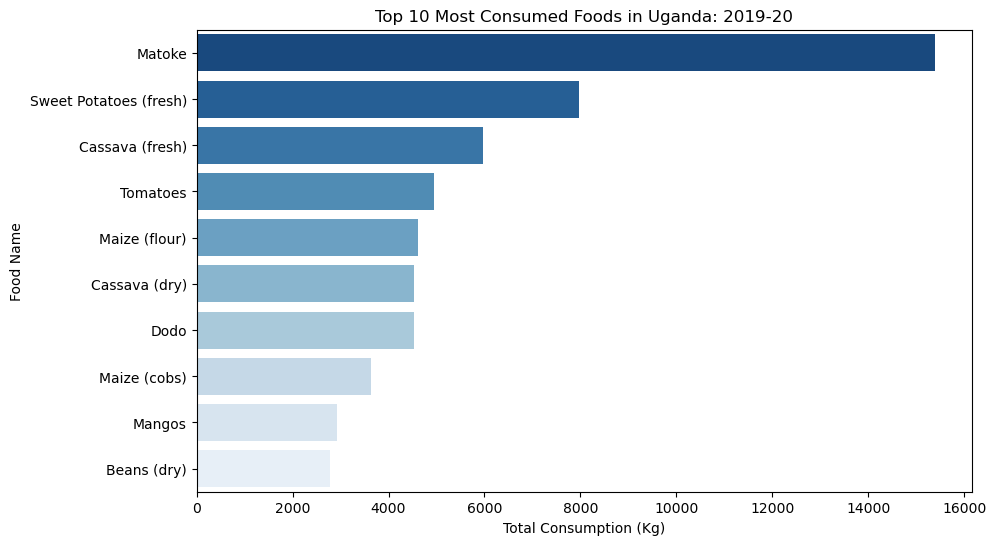

In [14]:
#19-20 Consumption by food, descending
column_sums8 = ugd8_c.sum()
sorted_sums8 = column_sums8.sort_values(ascending=False)
# Select the top 10 most consumed foods
top_10_foods8 = sorted_sums8.nlargest(10)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_foods8.values, y=top_10_foods8.index, hue=top_10_foods8.index, palette="Blues_r", legend=False)
# Labels and title
plt.xlabel("Total Consumption (Kg)")
plt.ylabel("Food Name")
plt.title("Top 10 Most Consumed Foods in Uganda: 2019-20")
plt.show()

## Nutritional Analysis: Looking at the Most-Deficient Nutrients

We decided for our analysis to focus on the nutrients that were most deficient at the household level.

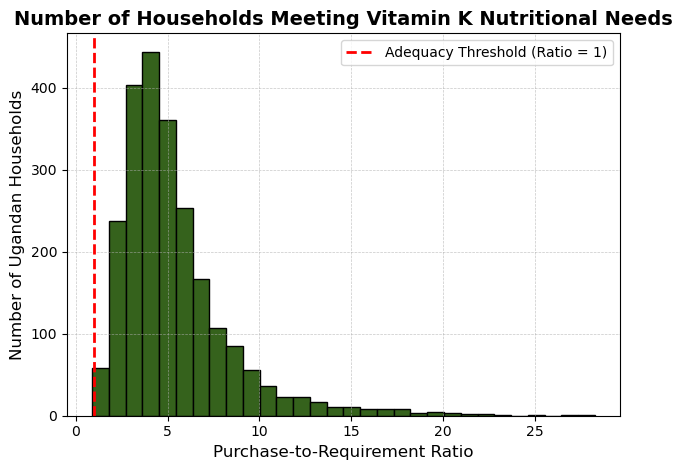

In [15]:
# Vitamin K needs
# Create figure and axis
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(nutrient_ratio['Vitamin K'], bins=30, color="#35621c", edgecolor="black")

# Add a vertical line at ratio = 1
ax.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Adequacy Threshold (Ratio = 1)')

# Set title and labels
ax.set_title("Number of Households Meeting Vitamin K Nutritional Needs", fontsize=14, fontweight='bold')
ax.set_xlabel("Purchase-to-Requirement Ratio", fontsize=12)
ax.set_ylabel("Number of Ugandan Households", fontsize=12)

# Add grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
ax.legend()

# Improve layout
fig.tight_layout()

# Store the figure object
plt_vitamin_k = fig

# Show the plot
plt.show()

The above histogram shows the number of Ugandan households at each purchase-to-requirement ratio for Vitamin K. At a ratio of 1, a household is purchasing enough food to satisfy their recommend nutritional needs. Having a ratio below 1 means the household is nutrient deficient.

In [16]:
# Calculate number of households below the adequacy threshold
below_threshold = (nutrient_ratio['Vitamin K'] < 1).sum()

# Total number of households
total_households = len(nutrient_ratio['Vitamin K'])

# Calculate percentage
percentage_below = (below_threshold / total_households) * 100

# Print the result
print(f"Percentage of households below adequacy threshold: {percentage_below:.2f}%")

Percentage of households below adequacy threshold: 0.09%


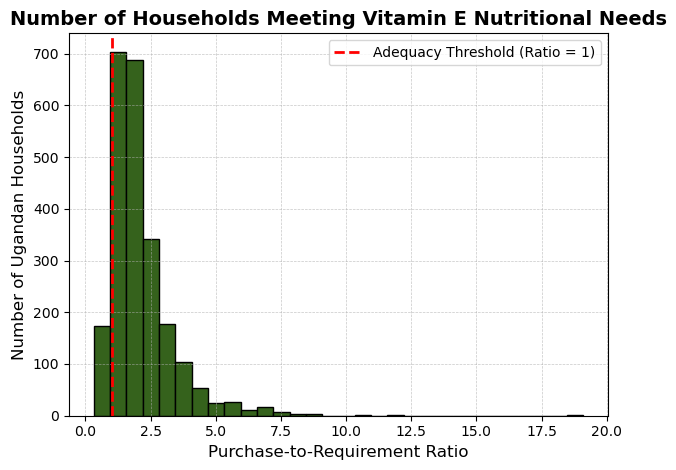

In [17]:
# Vitamin E needs
# Create figure and axis
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(nutrient_ratio['Vitamin E'], bins=30, color="#35621c", edgecolor="black")

# Add a vertical line at ratio = 1
ax.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Adequacy Threshold (Ratio = 1)')

# Set title and labels
ax.set_title("Number of Households Meeting Vitamin E Nutritional Needs", fontsize=14, fontweight='bold')
ax.set_xlabel("Purchase-to-Requirement Ratio", fontsize=12)
ax.set_ylabel("Number of Ugandan Households", fontsize=12)

# Add grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
ax.legend()

# Improve layout
fig.tight_layout()

# Store the figure object
plt_vitamin_e = fig

# Show the plot
plt.show()

The above histogram shows the number of Ugandan households at each purchase-to-requirement ratio for Vitamin E. At a ratio of 1, a household is purchasing enough food to satisfy their recommend nutritional needs. Having a ratio below 1 means the household is nutrient deficient.

In [18]:
# Calculate number of households below the adequacy threshold
below_threshold = (nutrient_ratio['Vitamin E'] < 1).sum()

# Total number of households
total_households = len(nutrient_ratio['Vitamin E'])

# Calculate percentage
percentage_below = (below_threshold / total_households) * 100

# Print the result
print(f"Percentage of households below adequacy threshold: {percentage_below:.2f}%")

Percentage of households below adequacy threshold: 9.38%


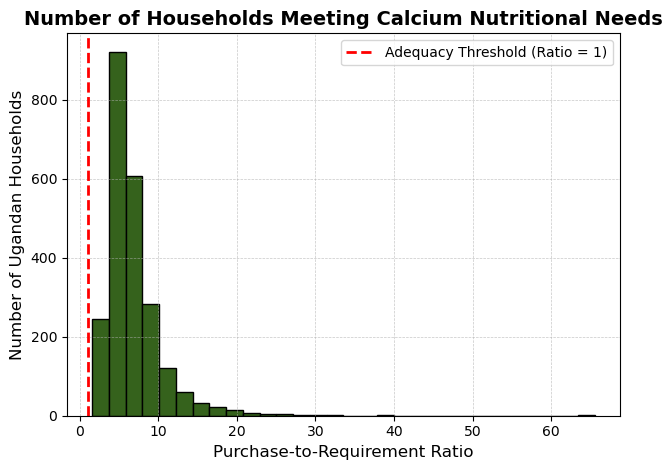

In [19]:
# Calcium needs
# Create figure and axis
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(nutrient_ratio['Calcium'], bins=30, color="#35621c", edgecolor="black")

# Add a vertical line at ratio = 1
ax.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Adequacy Threshold (Ratio = 1)')

# Set title and labels
ax.set_title("Number of Households Meeting Calcium Nutritional Needs", fontsize=14, fontweight='bold')
ax.set_xlabel("Purchase-to-Requirement Ratio", fontsize=12)
ax.set_ylabel("Number of Ugandan Households", fontsize=12)

# Add grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
ax.legend()

# Improve layout
fig.tight_layout()

# Store the figure object
plt_calcium = fig

# Show the plot
plt.show()

The above histogram shows the number of Ugandan households at each purchase-to-requirement ratio for Calcium. At a ratio of 1, a household is purchasing enough food to satisfy their recommend nutritional needs. Having a ratio below 1 means the household is nutrient deficient.

In [20]:
# Calculate number of households below the adequacy threshold
below_threshold = (nutrient_ratio['Calcium'] < 1).sum()

# Total number of households
total_households = len(nutrient_ratio['Calcium'])

# Calculate percentage
percentage_below = (below_threshold / total_households) * 100

# Print the result
print(f"Percentage of households below adequacy threshold: {percentage_below:.2f}%")

Percentage of households below adequacy threshold: 0.00%


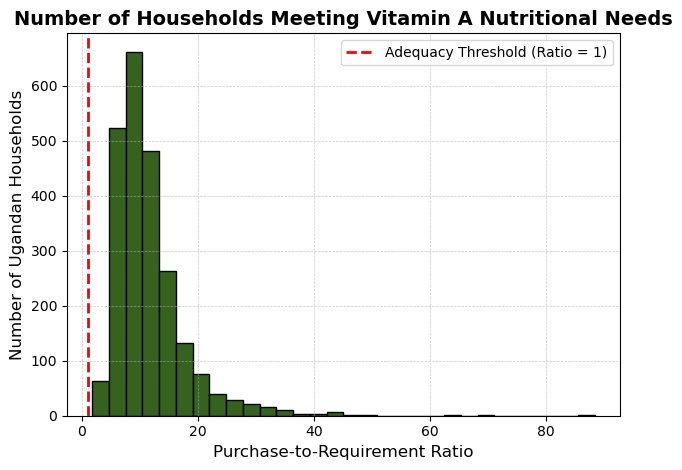

In [21]:
# Vitamin A needs
# Create figure and axis
fig, ax = plt.subplots()

# Plot the histogram
ax.hist(nutrient_ratio['Vitamin A'], bins=30, color="#35621c", edgecolor="black")

# Add a vertical line at ratio = 1
ax.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Adequacy Threshold (Ratio = 1)')

# Set title and labels
ax.set_title("Number of Households Meeting Vitamin A Nutritional Needs", fontsize=14, fontweight='bold')
ax.set_xlabel("Purchase-to-Requirement Ratio", fontsize=12)
ax.set_ylabel("Number of Ugandan Households", fontsize=12)

# Add grid
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend
ax.legend()

# Improve layout
fig.tight_layout()

# Store the figure object
plt_vitamin_a = fig

# Show the plot
plt.show()

The above histogram shows the number of Ugandan households at each purchase-to-requirement ratio for Vitamin A. At a ratio of 1, a household is purchasing enough food to satisfy their recommend nutritional needs. Having a ratio below 1 means the household is nutrient deficient.

In [22]:
# Calculate number of households below the adequacy threshold
below_threshold = (nutrient_ratio['Vitamin A'] < 1).sum()

# Total number of households
total_households = len(nutrient_ratio['Vitamin A'])

# Calculate percentage
percentage_below = (below_threshold / total_households) * 100

# Print the result
print(f"Percentage of households below adequacy threshold: {percentage_below:.2f}%")

Percentage of households below adequacy threshold: 0.00%


### Nutrient Sufficiency Over Time

In [24]:
# Read in the nutrient ratio data for each year
nutrient_data = {
    '2005-06': pd.read_csv('Nutrient Data/05-06 Nutrient Data.csv'),
    '2009-10': pd.read_csv('Nutrient Data/09-10 Nutrient Data.csv'),
    '2010-11': pd.read_csv('Nutrient Data/10-11 Nutrient Data.csv'),
    '2011-12': pd.read_csv('Nutrient Data/11-12 Nutrient Data.csv'),
    '2013-14': pd.read_csv('Nutrient Data/13-14 Nutrient Data.csv'),
    '2015-16': pd.read_csv('Nutrient Data/15-16 Nutrient Data.csv'),
    '2018-19': pd.read_csv('Nutrient Data/18-19 Nutrient Data.csv'),
    '2019-20': pd.read_csv('Nutrient Data/19-20 Nutrient Data.csv'),
}

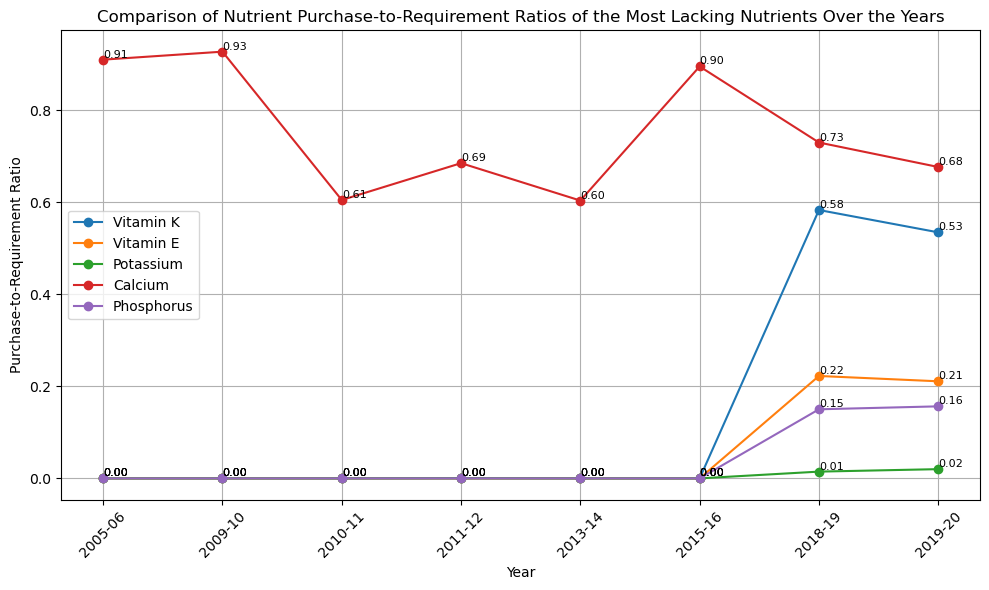

In [25]:
# List of nutrients to analyze
nutrients = ['Vitamin K', 'Vitamin E', 'Potassium', 'Calcium', 'Phosphorus']
# Create a dictionary to hold the nutrient ratios per year for each nutrient
nutrient_ratios = {nutrient: {} for nutrient in nutrients}
# Loop through each nutrient and calculate the ratio for each year
for nutrient in nutrients:
    for year, df in nutrient_data.items():
        nutrient_ratios[nutrient][year] = df[nutrient].mean() 
# Create a plot
plt.figure(figsize=(10, 6))

# Plot each nutrient's ratio over the years
for nutrient in nutrients:
    years = list(nutrient_ratios[nutrient].keys())
    values = list(nutrient_ratios[nutrient].values())
    plt.plot(years, values, marker='o', linestyle='-', label=f'{nutrient}')
    
    # Add text labels to each point
    for x, y in zip(years, values):
        plt.text(x, y, f'{y:.2f}', fontsize=8, ha='left', va='bottom')

# Customize plot
plt.title('Comparison of Nutrient Purchase-to-Requirement Ratios of the Most Lacking Nutrients Over the Years')
plt.xlabel('Year')
plt.ylabel('Purchase-to-Requirement Ratio')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
# Display
plt.tight_layout()
plt.show()

In the period 2019-2020, the average household only purchased 68% of their nutritional requirement of calcium. 
They only purchased 53% of their nutritional requirement of Vitamin K.
They only purchased 21% of their nutritional requirement of Vitamin E.

### How can we increase these most limited nutrients by increasing the consumption of existing foods?

We want to address Vitamin E deficiency by adding a subsidy for tomatoes and mangoes. 
We want to address Vitamin K deficiency by adding a subsidy for eggs, pumpkin, beef

In [29]:
#2019-20
ugd8_result = cfe.Regression(y=np.log(ugd8_x.stack()),d=ugd8_z)

In [30]:
xhat = ugd8_result.predicted_expenditures()
#Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()
#Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

In [22]:
#Prices per kilogram:
pbar = ugd8_p.mean(axis=1)
pbar = pbar.reset_index(level="u", drop=True) #Reset index so that 'j' becomes a column instead of part of a MultiIndex
pbar = pbar.reindex(ugd8_result.beta.index) #Only use prices for goods we can estimate
#Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar = pbar.replace(np.nan,1)
#Define a function to change a single price in the vector $p$:
def my_prices(p0,j,p=pbar):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

### Which food items are available to subsidize?

In [23]:
# Check to see which food items exist in the dataset- these are the ones we could subsidize!
tmp = ugd8_result.predicted_expenditures()
tmp.index.get_level_values('j').unique()

Index(['Avocado', 'Beans (dry)', 'Beans (fresh)', 'Beef', 'Bogoya', 'Bread',
       'Cabbage (green)', 'Cassava (dry)', 'Cassava (fresh)', 'Chapati',
       'Cooking Oil (refined)', 'Dodo', 'Donuts', 'Eggplant', 'Eggs',
       'Goat Meat', 'Ground Nuts (pounded)', 'Ground Nuts (shelled)',
       'Irish Potatoes', 'Jam/Marmalade', 'Maize (cobs)', 'Maize (flour)',
       'Mangos', 'Matoke', 'Millet Flour', 'Mukene', 'Onions', 'Oranges',
       'Other Vegetables', 'Pawpaw', 'Pumpkins', 'Restaurant (food)',
       'Restaurant (soda)', 'Rice', 'Salt', 'Sweet Potatoes (fresh)',
       'Tea (leaves)', 'Tomatoes', 'Waragi', 'Yams (arrowroot)'],
      dtype='object', name='j')

## Addressing a Vitamin E deficiency

In [ ]:
Based on the earlier graph, Vitamin E is deficient by 79%.

### Determining how much to subsidize tomatoes

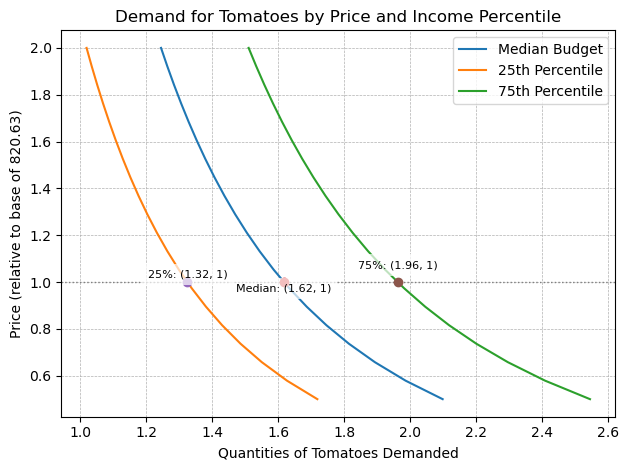

In [37]:
use = 'Tomatoes'
scale = np.linspace(0.5, 2, 20)

# Store the demand values for each curve
q_median = [ugd8_result.demands(xref, my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_25 = [ugd8_result.demands(xbar.quantile(0.25), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_75 = [ugd8_result.demands(xbar.quantile(0.75), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]

# Plot demand curves
plt.plot(q_median, scale, label="Median Budget")
plt.plot(q_25, scale, label="25th Percentile")
plt.plot(q_75, scale, label="75th Percentile")

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a horizontal line at y=1
plt.axhline(y=1, color='gray', linestyle=':', linewidth=1)

# Interpolate to find where each curve intersects y=1
def find_intersection(q_vals, scale_vals, target_y=1):
    return np.interp(target_y, scale_vals, q_vals)

# Define vertical text offsets to avoid overlap
offsets = [-0.04, 0.02, 0.06]

for (label, q_vals, offset) in zip(["Median", "25%", "75%"], [q_median, q_25, q_75], offsets):
    x_at_y1 = find_intersection(q_vals, scale)
    plt.plot(x_at_y1, 1, 'o')  # Mark the point
    plt.text(x_at_y1, 1 + offset, f"{label}: ({x_at_y1:.2f}, 1)", 
             ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Labels and legend
plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")
plt.legend()
plt.title(f"Demand for {use} by Price and Income Percentile")

plt.tight_layout()
plt.show()

### Determining how much to subsidize mangoes

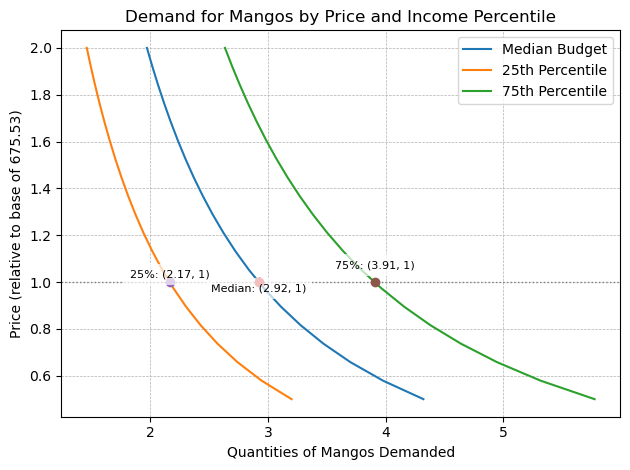

In [38]:
use = 'Mangos'
scale = np.linspace(0.5, 2, 20)

# Store the demand values for each curve
q_median = [ugd8_result.demands(xref, my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_25 = [ugd8_result.demands(xbar.quantile(0.25), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_75 = [ugd8_result.demands(xbar.quantile(0.75), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]

# Plot demand curves
plt.plot(q_median, scale, label="Median Budget")
plt.plot(q_25, scale, label="25th Percentile")
plt.plot(q_75, scale, label="75th Percentile")

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a horizontal line at y=1
plt.axhline(y=1, color='gray', linestyle=':', linewidth=1)

# Interpolate to find where each curve intersects y=1
def find_intersection(q_vals, scale_vals, target_y=1):
    return np.interp(target_y, scale_vals, q_vals)

# Define vertical text offsets to avoid overlap
offsets = [-0.04, 0.02, 0.06]

for (label, q_vals, offset) in zip(["Median", "25%", "75%"], [q_median, q_25, q_75], offsets):
    x_at_y1 = find_intersection(q_vals, scale)
    plt.plot(x_at_y1, 1, 'o')  # Mark the point
    plt.text(x_at_y1, 1 + offset, f"{label}: ({x_at_y1:.2f}, 1)", 
             ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Labels and legend
plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")
plt.legend()
plt.title(f"Demand for {use} by Price and Income Percentile")

plt.tight_layout()
plt.show()

## Addressing a Vitamin K deficiency

Based on the earlier graph, Vitamin K is deficient by 47%.

### Determining how much to subsidize beef

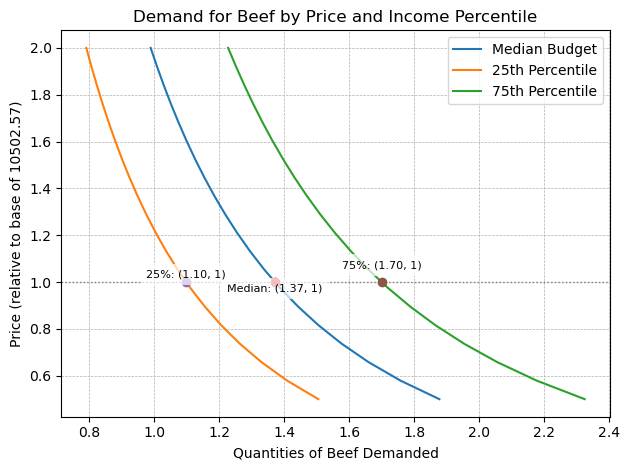

In [39]:
use = 'Beef'
scale = np.linspace(0.5, 2, 20)

# Store the demand values for each curve
q_median = [ugd8_result.demands(xref, my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_25 = [ugd8_result.demands(xbar.quantile(0.25), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_75 = [ugd8_result.demands(xbar.quantile(0.75), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]

# Plot demand curves
plt.plot(q_median, scale, label="Median Budget")
plt.plot(q_25, scale, label="25th Percentile")
plt.plot(q_75, scale, label="75th Percentile")

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a horizontal line at y=1
plt.axhline(y=1, color='gray', linestyle=':', linewidth=1)

# Interpolate to find where each curve intersects y=1
def find_intersection(q_vals, scale_vals, target_y=1):
    return np.interp(target_y, scale_vals, q_vals)

# Define vertical text offsets to avoid overlap
offsets = [-0.04, 0.02, 0.06]

for (label, q_vals, offset) in zip(["Median", "25%", "75%"], [q_median, q_25, q_75], offsets):
    x_at_y1 = find_intersection(q_vals, scale)
    plt.plot(x_at_y1, 1, 'o')  # Mark the point
    plt.text(x_at_y1, 1 + offset, f"{label}: ({x_at_y1:.2f}, 1)", 
             ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Labels and legend
plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")
plt.legend()
plt.title(f"Demand for {use} by Price and Income Percentile")

plt.tight_layout()
plt.show()

### Determining how much to subsidize eggs

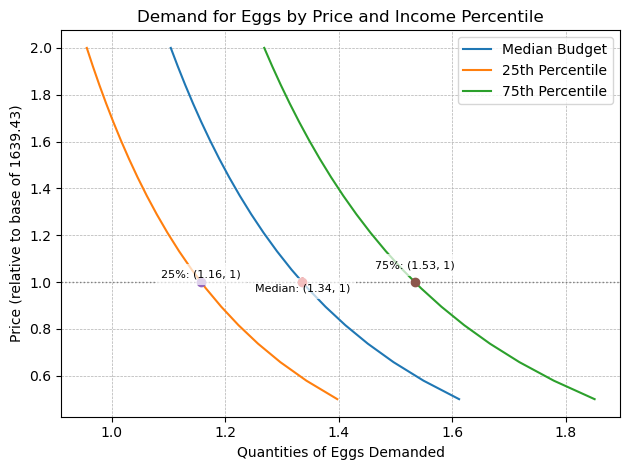

In [40]:
use = 'Eggs'
scale = np.linspace(0.5, 2, 20)

# Store the demand values for each curve
q_median = [ugd8_result.demands(xref, my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_25 = [ugd8_result.demands(xbar.quantile(0.25), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_75 = [ugd8_result.demands(xbar.quantile(0.75), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]

# Plot demand curves
plt.plot(q_median, scale, label="Median Budget")
plt.plot(q_25, scale, label="25th Percentile")
plt.plot(q_75, scale, label="75th Percentile")

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a horizontal line at y=1
plt.axhline(y=1, color='gray', linestyle=':', linewidth=1)

# Interpolate to find where each curve intersects y=1
def find_intersection(q_vals, scale_vals, target_y=1):
    return np.interp(target_y, scale_vals, q_vals)

# Define vertical text offsets to avoid overlap
offsets = [-0.04, 0.02, 0.06]

for (label, q_vals, offset) in zip(["Median", "25%", "75%"], [q_median, q_25, q_75], offsets):
    x_at_y1 = find_intersection(q_vals, scale)
    plt.plot(x_at_y1, 1, 'o')  # Mark the point
    plt.text(x_at_y1, 1 + offset, f"{label}: ({x_at_y1:.2f}, 1)", 
             ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Labels and legend
plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")
plt.legend()
plt.title(f"Demand for {use} by Price and Income Percentile")

plt.tight_layout()
plt.show()

### Determining how much to subsidize pumpkin

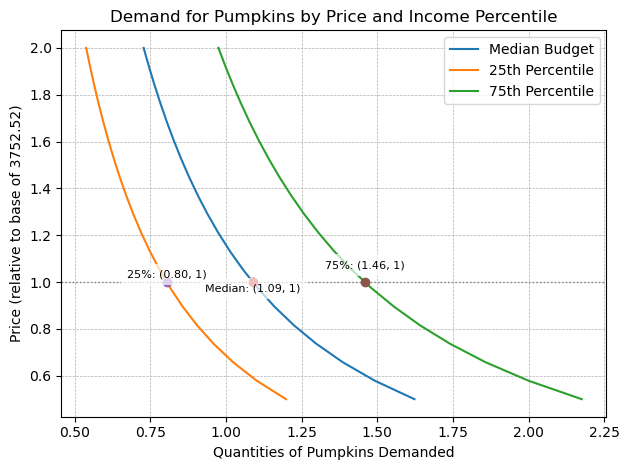

In [41]:
use = 'Pumpkins'
scale = np.linspace(0.5, 2, 20)

# Store the demand values for each curve
q_median = [ugd8_result.demands(xref, my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_25 = [ugd8_result.demands(xbar.quantile(0.25), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]
q_75 = [ugd8_result.demands(xbar.quantile(0.75), my_prices(pbar[use]*s, use, pbar))[use] for s in scale]

# Plot demand curves
plt.plot(q_median, scale, label="Median Budget")
plt.plot(q_25, scale, label="25th Percentile")
plt.plot(q_75, scale, label="75th Percentile")

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add a horizontal line at y=1
plt.axhline(y=1, color='gray', linestyle=':', linewidth=1)

# Interpolate to find where each curve intersects y=1
def find_intersection(q_vals, scale_vals, target_y=1):
    return np.interp(target_y, scale_vals, q_vals)

# Define vertical text offsets to avoid overlap
offsets = [-0.04, 0.02, 0.06]

for (label, q_vals, offset) in zip(["Median", "25%", "75%"], [q_median, q_25, q_75], offsets):
    x_at_y1 = find_intersection(q_vals, scale)
    plt.plot(x_at_y1, 1, 'o')  # Mark the point
    plt.text(x_at_y1, 1 + offset, f"{label}: ({x_at_y1:.2f}, 1)", 
             ha='center', fontsize=8, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Labels and legend
plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")
plt.legend()
plt.title(f"Demand for {use} by Price and Income Percentile")

plt.tight_layout()
plt.show()